In [6]:
import pandas as pd
import matplotlib.pyplot as plt

mvc = pd.read_csv('MVC.csv')

/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_63251/629964291.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  mvc = pd.read_csv('MVC.csv')


In [7]:
mvc.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [8]:
mvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075961 entries, 0 to 2075960
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [9]:
total_nans = mvc.isna().sum().sum()
print(f"Total NaNs in DataFrame: {total_nans}")

Total NaNs in DataFrame: 17766266


In [10]:
nan_counts_per_row = mvc.isna().sum(axis=1)
print(nan_counts_per_row)


0          12
1          15
2          13
3          10
4          11
           ..
2075956     3
2075957     8
2075958     7
2075959     7
2075960     8
Length: 2075961, dtype: int64


In [11]:
# Checking NaN proportions for each column
nan_proportion = mvc.isna().sum() / len(mvc)
print(nan_proportion)

CRASH DATE                       0.000000
CRASH TIME                       0.000000
BOROUGH                          0.311146
ZIP CODE                         0.311266
LATITUDE                         0.112559
LONGITUDE                        0.112559
LOCATION                         0.112559
ON STREET NAME                   0.212293
CROSS STREET NAME                0.378002
OFF STREET NAME                  0.832204
NUMBER OF PERSONS INJURED        0.000009
NUMBER OF PERSONS KILLED         0.000015
NUMBER OF PEDESTRIANS INJURED    0.000000
NUMBER OF PEDESTRIANS KILLED     0.000000
NUMBER OF CYCLIST INJURED        0.000000
NUMBER OF CYCLIST KILLED         0.000000
NUMBER OF MOTORIST INJURED       0.000000
NUMBER OF MOTORIST KILLED        0.000000
CONTRIBUTING FACTOR VEHICLE 1    0.003278
CONTRIBUTING FACTOR VEHICLE 2    0.155045
CONTRIBUTING FACTOR VEHICLE 3    0.928554
CONTRIBUTING FACTOR VEHICLE 4    0.983866
CONTRIBUTING FACTOR VEHICLE 5    0.995629
COLLISION_ID                     0

In [12]:
# Drop columns with NaN proportion greater than the threshold

threshold = 0.5

mvc_cleaned = mvc.loc[:, nan_proportion <= threshold]

mvc_cleaned.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,...,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,...,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN


In [13]:
mvc_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075961 entries, 0 to 2075960
Data columns (total 22 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   NUMBER OF PERSONS INJURED      float64
 10  NUMBER OF PERSONS KILLED       float64
 11  NUMBER OF PEDESTRIANS INJURED  int64  
 12  NUMBER OF PEDESTRIANS KILLED   int64  
 13  NUMBER OF CYCLIST INJURED      int64  
 14  NUMBER OF CYCLIST KILLED       int64  
 15  NUMBER OF MOTORIST INJURED     int64  
 16  NUMBER OF MOTORIST KILLED      int64  
 17  CONTRIBUTING FACTOR VEHICLE 1  object 
 18  CO

In [14]:
# Convert the crash date column from string to datetime format
mvc_cleaned['CRASH DATE'] = pd.to_datetime(mvc_cleaned['CRASH DATE'], format='%m/%d/%Y')

# Convert the date column to Epoch time (number of seconds since 01-01-1970)
mvc_cleaned['epoch_time'] = (mvc_cleaned['CRASH DATE'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

mvc_cleaned.head()

/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_63251/3006591871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_cleaned['CRASH DATE'] = pd.to_datetime(mvc_cleaned['CRASH DATE'], format='%m/%d/%Y')
/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_63251/3006591871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_cleaned['epoch_time'] = (mvc_cleaned['CRASH DATE'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,epoch_time
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,1631318400
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,...,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,1648252800
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,1656460800
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,...,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,1631318400
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,...,0,0,0,0,NaN,NaN,4486609,NaN,NaN,1639440000


In [15]:
# Dropping original crash date column 
#mvc_cleaned = mvc_cleaned.drop('CRASH DATE', axis=1)

In [16]:
mvc_cleaned.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,epoch_time
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,1631318400
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,...,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,1648252800
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,1656460800
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,...,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,1631318400
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,...,0,0,0,0,NaN,NaN,4486609,NaN,NaN,1639440000


In [17]:
mvc_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075961 entries, 0 to 2075960
Data columns (total 23 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     object        
 2   BOROUGH                        object        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON STREET NAME                 object        
 8   CROSS STREET NAME              object        
 9   NUMBER OF PERSONS INJURED      float64       
 10  NUMBER OF PERSONS KILLED       float64       
 11  NUMBER OF PEDESTRIANS INJURED  int64         
 12  NUMBER OF PEDESTRIANS KILLED   int64         
 13  NUMBER OF CYCLIST INJURED      int64         
 14  NUMBER OF CYCLIST KILLED       int64         
 15  NUMBER OF MOTOR

In [18]:
# Convert time to a continuous scale

mvc_cleaned['time_as_hours'] = pd.to_datetime(mvc_cleaned['CRASH TIME'], format='%H:%M').dt.hour + pd.to_datetime(mvc_cleaned['CRASH TIME'], format='%H:%M').dt.minute / 60
mvc_cleaned.head()

/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_63251/3529005517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_cleaned['time_as_hours'] = pd.to_datetime(mvc_cleaned['CRASH TIME'], format='%H:%M').dt.hour + pd.to_datetime(mvc_cleaned['CRASH TIME'], format='%H:%M').dt.minute / 60


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,epoch_time,time_as_hours
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,1631318400,2.650000
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,...,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,1648252800,11.750000
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,1656460800,6.916667
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,...,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,1631318400,9.583333
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,...,0,0,0,NaN,NaN,4486609,NaN,NaN,1639440000,8.216667


In [19]:
# Drop original crash time column 

mvc_cleaned = mvc_cleaned.drop('CRASH TIME', axis=1)
mvc_cleaned.head()

,CRASH DATE,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,epoch_time,time_as_hours
0,2021-09-11,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,...,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,1631318400,2.650000
1,2022-03-26,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,...,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,1648252800,11.750000
2,2022-06-29,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,...,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,1656460800,6.916667
3,2021-09-11,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,0.0,...,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,1631318400,9.583333
4,2021-12-14,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,0.0,...,0,0,0,NaN,NaN,4486609,NaN,NaN,1639440000,8.216667


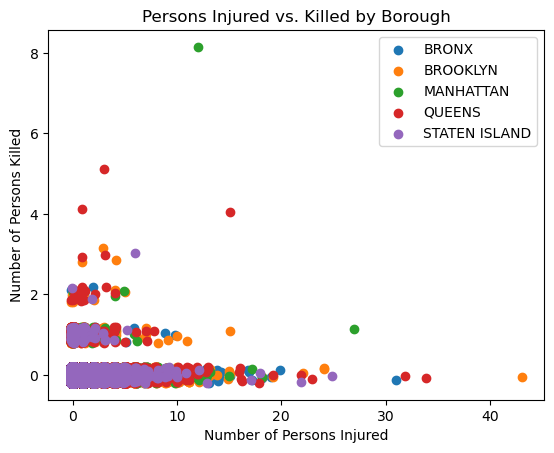

In [20]:
# Data plotting to explore dataset

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

jitter_magnitude = 0.2

# Group by borough to apply different colors automatically
for name, group in mvc_cleaned.groupby('BOROUGH'):
    # Apply jitter: random uniform distribution within the specified range
    jittered_x = group['NUMBER OF PERSONS INJURED'] + np.random.uniform(-jitter_magnitude, jitter_magnitude, size=len(group))
    jittered_y = group['NUMBER OF PERSONS KILLED'] + np.random.uniform(-jitter_magnitude, jitter_magnitude, size=len(group))
    
    ax.scatter(jittered_x, jittered_y, label=name)

ax.set_xlabel('Number of Persons Injured')
ax.set_ylabel('Number of Persons Killed')
ax.set_title('Persons Injured vs. Killed by Borough')
ax.legend()

plt.show()

In [21]:
# Borough stats
borough_stats = mvc_cleaned.groupby('BOROUGH').agg(
    total_accidents=('BOROUGH', 'size'),  # Counting the number of rows (accidents) per group
    total_persons_injured=('NUMBER OF PERSONS INJURED', 'sum'),
    total_persons_killed=('NUMBER OF PERSONS KILLED', 'sum')
).reset_index()

# Calculate proportions
borough_stats['injured_per_accident'] = borough_stats['total_persons_injured'] / borough_stats['total_accidents']
borough_stats['killed_per_accident'] = borough_stats['total_persons_killed'] / borough_stats['total_accidents']

print(borough_stats)

         BOROUGH  total_accidents  total_persons_injured  \
0          BRONX           211407                69185.0   
1       BROOKLYN           454849               150423.0   
2      MANHATTAN           320297                67406.0   
3         QUEENS           383458               115389.0   
4  STATEN ISLAND            60024                17152.0   

   total_persons_killed  injured_per_accident  killed_per_accident  
0                 274.0              0.327260             0.001296  
1                 624.0              0.330710             0.001372  
2                 330.0              0.210448             0.001030  
3                 528.0              0.300917             0.001377  
4                  95.0              0.285752             0.001583  


In [22]:
borough_stats.head()

,BOROUGH,total_accidents,total_persons_injured,total_persons_killed,injured_per_accident,killed_per_accident
0,BRONX,211407,69185.0,274.0,0.327260,0.001296
1,BROOKLYN,454849,150423.0,624.0,0.330710,0.001372
2,MANHATTAN,320297,67406.0,330.0,0.210448,0.001030
3,QUEENS,383458,115389.0,528.0,0.300917,0.001377
4,STATEN ISLAND,60024,17152.0,95.0,0.285752,0.001583


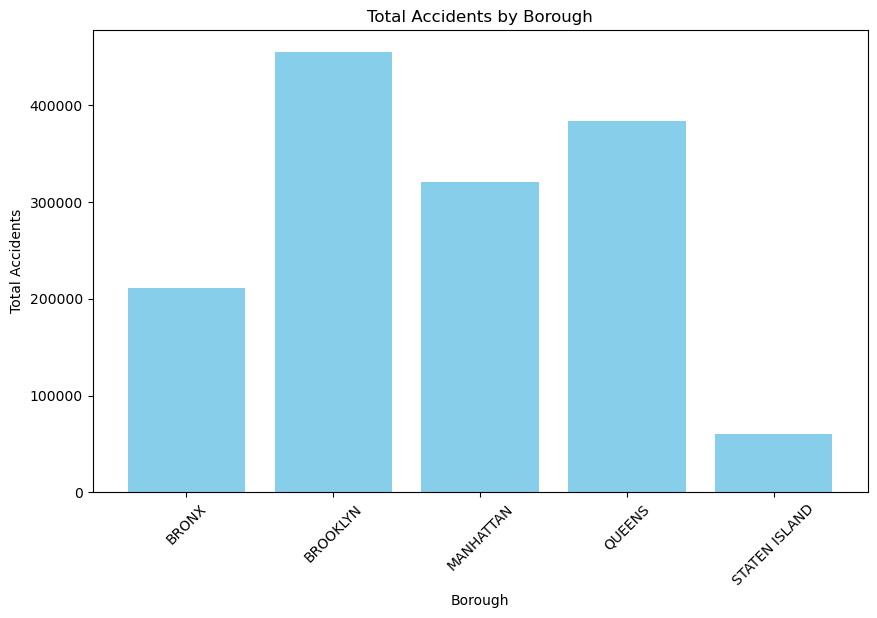

In [23]:
# Total Accidents by borough
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
plt.bar(borough_stats['BOROUGH'], borough_stats['total_accidents'], color='skyblue')  # You can customize the color
plt.xlabel('Borough')
plt.ylabel('Total Accidents')
plt.title('Total Accidents by Borough')
plt.xticks(rotation=45)  # Optional: Rotates the x-axis labels to make them more readable
plt.show()

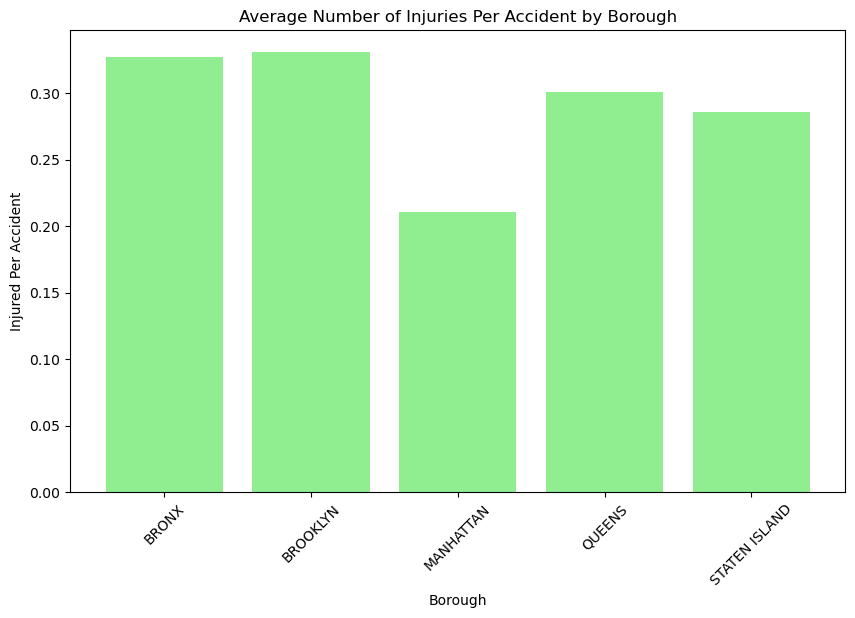

In [24]:
# Average number of injuries per accident by borough
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
plt.bar(borough_stats['BOROUGH'], borough_stats['injured_per_accident'], color='lightgreen')  # You can customize the color
plt.xlabel('Borough')
plt.ylabel('Injured Per Accident')
plt.title('Average Number of Injuries Per Accident by Borough')
plt.xticks(rotation=45)  # Optional: Rotates the x-axis labels to make them more readable
plt.show()

/Users/adnanarnaout/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


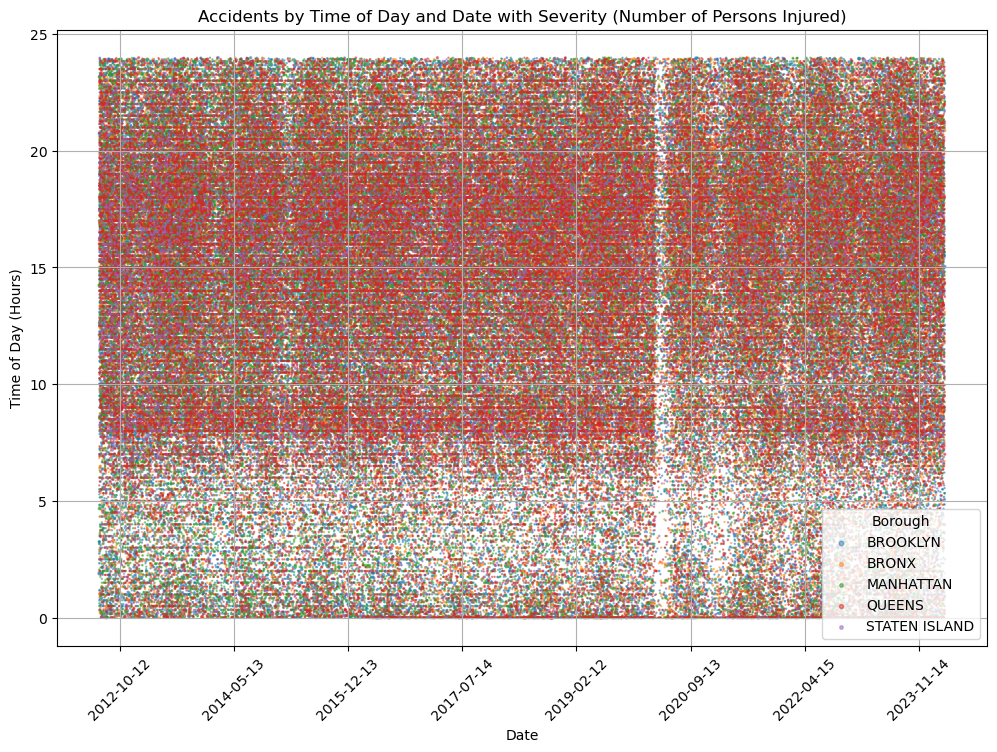

In [25]:
# date and time in each borough for accident
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

borough_filtered = mvc_cleaned.dropna(subset=['BOROUGH'])


for borough in borough_filtered['BOROUGH'].unique():
    borough_data = borough_filtered[borough_filtered['BOROUGH'] == borough]
    plt.scatter(borough_data['epoch_time'], borough_data['time_as_hours'], 
                s=borough_data['NUMBER OF PERSONS INJURED']*0.5,  # Multiply by a factor to make sizes visible
                alpha=0.5, label=borough)

# Formatting the x-axis to show readable dates instead of epoch times
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x, unit='s').strftime('%Y-%m-%d')))

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Time of Day (Hours)')
plt.title('Accidents by Time of Day and Date with Severity (Number of Persons Injured)')
plt.legend(title='Borough')
plt.grid(True)
plt.show()

In [26]:
# Total injured and killed per accident
mvc_cleaned['total_injured'] = mvc_cleaned[['NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED', 
                          'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']].sum(axis=1)
mvc_cleaned['total_killed'] = mvc_cleaned[['NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS KILLED', 
                         'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']].sum(axis=1)

In [27]:
mvc_cleaned.head()

,CRASH DATE,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,epoch_time,time_as_hours,total_injured,total_killed
0,2021-09-11,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,...,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,1631318400,2.650000,4.0,0.0
1,2022-03-26,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,...,0,Pavement Slippery,NaN,4513547,Sedan,NaN,1648252800,11.750000,2.0,0.0
2,2022-06-29,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,...,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,1656460800,6.916667,0.0,0.0
3,2021-09-11,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,0.0,...,0,Unspecified,NaN,4456314,Sedan,NaN,1631318400,9.583333,0.0,0.0
4,2021-12-14,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,0.0,...,0,NaN,NaN,4486609,NaN,NaN,1639440000,8.216667,0.0,0.0


In [28]:
# groub by borough
grouped = mvc_cleaned.groupby('BOROUGH')[['total_injured', 'total_killed']].sum().reset_index()
grouped.head()

,BOROUGH,total_injured,total_killed
0,BRONX,137427.0,539.0
1,BROOKLYN,298574.0,1233.0
2,MANHATTAN,133958.0,656.0
3,QUEENS,229306.0,1051.0
4,STATEN ISLAND,34243.0,189.0


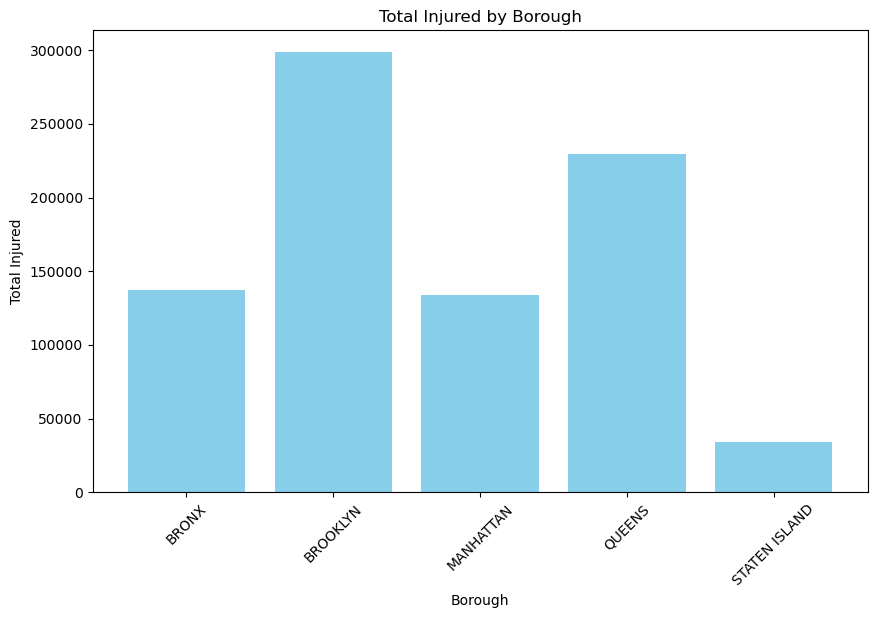

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(grouped['BOROUGH'], grouped['total_injured'], color='skyblue')
plt.xlabel('Borough')
plt.ylabel('Total Injured')
plt.title('Total Injured by Borough')
plt.xticks(rotation=45)
plt.show()

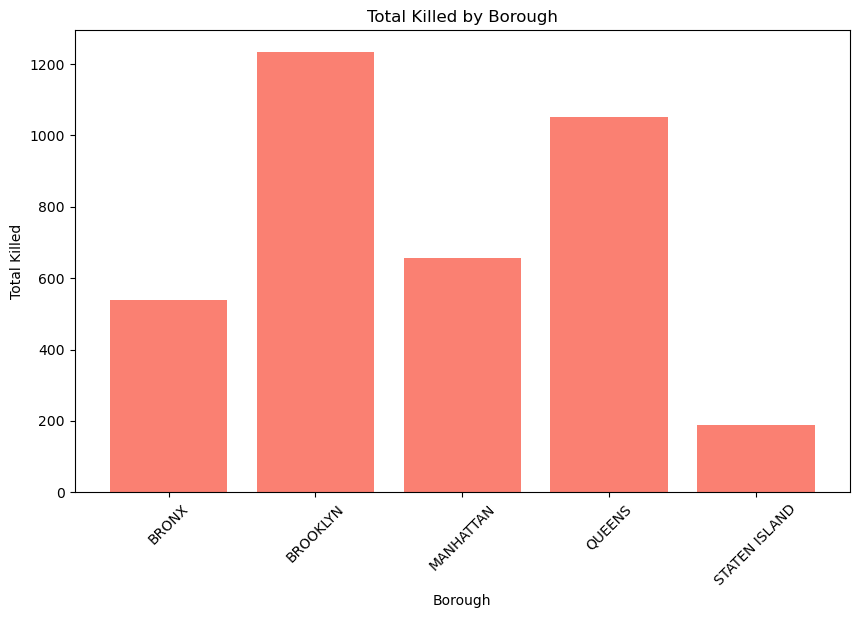

In [30]:
# Plot for total_killed
plt.figure(figsize=(10, 6))
plt.bar(grouped['BOROUGH'], grouped['total_killed'], color='salmon')
plt.xlabel('Borough')
plt.ylabel('Total Killed')
plt.title('Total Killed by Borough')
plt.xticks(rotation=45)
plt.show()


In [31]:
mvc_cleaned["CONTRIBUTING FACTOR VEHICLE 1"].nunique()
unique_values = mvc_cleaned['CONTRIBUTING FACTOR VEHICLE 1'].unique()
unique_values

array(['Aggressive Driving/Road Rage', 'Pavement Slippery',
       'Following Too Closely', 'Unspecified', nan, 'Passing Too Closely',
       'Driver Inexperience', 'Passing or Lane Usage Improper',
       'Turning Improperly', 'Unsafe Lane Changing', 'Unsafe Speed',
       'Reaction to Uninvolved Vehicle', 'Steering Failure',
       'Traffic Control Disregarded', 'Other Vehicular',
       'Driver Inattention/Distraction', 'Oversized Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Alcohol Involvement', 'View Obstructed/Limited',
       'Failure to Yield Right-of-Way', 'Illnes', 'Lost Consciousness',
       'Brakes Defective', 'Backing Unsafely', 'Glare',
       'Passenger Distraction', 'Fell Asleep', 'Obstruction/Debris',
       'Tinted Windows', 'Animals Action', 'Drugs (illegal)',
       'Pavement Defective', 'Other Lighting Defects',
       'Outside Car Distraction', 'Driverless/Runaway Vehicle',
       'Tire Failure/Inadequate', 'Fatigued/Drowsy',


In [32]:
# Group by 'BOROUGH' and 'CONTRIBUTING FACTOR VEHICLE 1' and sum 'total_injured'
grouped_2 = mvc_cleaned.groupby(['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1']).agg(total_injuries=('total_injured', 'sum')).reset_index()
grouped_2.head()

,BOROUGH,CONTRIBUTING FACTOR VEHICLE 1,total_injuries
0,BRONX,80,4.0
1,BRONX,Accelerator Defective,148.0
2,BRONX,Aggressive Driving/Road Rage,1335.0
3,BRONX,Alcohol Involvement,2456.0
4,BRONX,Animals Action,34.0


In [33]:
# Get the top N contributing factors based on the sum of total_injured

N = 10

top_factors = mvc_cleaned.groupby('CONTRIBUTING FACTOR VEHICLE 1')['total_injured'].sum().sort_values(ascending=False).head(N)

# Filter the original df to include only the top factors
filtered_mvc = mvc_cleaned[mvc_cleaned['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_factors.index)]

# Now group and plot as before
grouped_top = filtered_mvc.groupby(['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1']).agg(total_injuries=('total_injured', 'sum')).reset_index()

# Plot
sns.barplot(data=grouped_top, x='BOROUGH', y='total_injuries', hue='CONTRIBUTING FACTOR VEHICLE 1')
plt.legend(title='Contributing Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


NameError: name 'sns' is not defined

In [ ]:
# Get the top 10 contributing factors based on the sum of total_killed

N = 10

top_factors_killed = mvc_cleaned.groupby('CONTRIBUTING FACTOR VEHICLE 1')['total_killed'].sum().sort_values(ascending=False).head(N)

# Filter the original df to include only the top factors
filtered_mvc = mvc_cleaned[mvc_cleaned['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_factors_killed.index)]

# Now group and plot as before
grouped_top = filtered_mvc.groupby(['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1']).agg(total_killed=('total_killed', 'sum')).reset_index()

# Plot
sns.barplot(data=grouped_top, x='BOROUGH', y='total_killed', hue='CONTRIBUTING FACTOR VEHICLE 1')
plt.legend(title='Contributing Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# date and time in each borough for accident

plt.figure(figsize=(12, 8))

borough_filtered = mvc_cleaned.dropna(subset=['BOROUGH'])

for borough in borough_filtered['BOROUGH'].unique():
    borough_data = borough_filtered[borough_filtered['BOROUGH'] == borough]
    plt.scatter(borough_data['epoch_time'], borough_data['time_as_hours'], 
                s=borough_data['total_injured']*0.5,  # Multiply by a factor to make sizes visible
                alpha=0.5, label=borough)

# Formatting the x-axis to show readable dates instead of epoch times
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x, unit='s').strftime('%Y-%m-%d')))

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Time of Day (Hours)')
plt.title('Total Injured by Time of Day and Date')
plt.legend(title='Borough')
plt.grid(True)
plt.show()

In [ ]:
# date and time in each borough for accident

plt.figure(figsize=(12, 8))

for borough in borough_filtered['BOROUGH'].unique():
    borough_data = borough_filtered[borough_filtered['BOROUGH'] == borough]
    plt.scatter(borough_data['epoch_time'], borough_data['time_as_hours'], 
                s=borough_data['total_killed']*5,  # Multiply by a factor to make sizes visible
                alpha=0.5, label=borough)

# Formatting the x-axis to show readable dates instead of epoch times
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x, unit='s').strftime('%Y-%m-%d')))

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Time of Day (Hours)')
plt.title('Total Killed by Time of Day and Date')
plt.legend(title='Borough')
plt.grid(True)
plt.show()

In [ ]:
# Accidents per year

# Convert the 'readable_date' column to datetime
mvc_cleaned['readable_date'] = pd.to_datetime(mvc_cleaned['readable_date'])

# Extract the year from the 'readable_date' column
mvc_cleaned['year'] = mvc_cleaned['readable_date'].dt.year

# Count the number of accidents per year
accidents_per_year = mvc_cleaned['year'].value_counts().sort_index()

# Plotting the trend of accidents per year
plt.figure(figsize=(12, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='b')

plt.title('Total Number of Accidents Per Year (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(accidents_per_year.index, rotation=45)
plt.tight_layout()  # Adjust the layout
plt.show()


In [ ]:
# Accidents per year per borough
accidents_per_year_borough = mvc_cleaned.groupby(['year', 'BOROUGH']).size().unstack(fill_value=0)

# Plotting the total number of accidents per borough per year
accidents_per_year_borough.plot(kind='line', marker='o', figsize=(14, 8))

plt.title('Total Number of Accidents Per Borough Per Year (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(range(2012, 2024)) 
plt.legend(title='Borough', loc='upper left')
plt.tight_layout() 
plt.show()

In [ ]:
# Unique on street values in whole dataset
mvc_cleaned['ON STREET NAME'].nunique()

In [ ]:
# On street name frequency
street_name_frequencies = mvc_cleaned['ON STREET NAME'].value_counts()
street_name_frequencies

In [ ]:
# Top 10 most frequent street accidents
top_streets = mvc_cleaned['ON STREET NAME'].value_counts().head(10)

# Now we will plot the frequency of the top 10 street names
plt.figure(figsize=(12, 6))
top_streets.plot(kind='bar', color='skyblue')

plt.title('Top 10 Street Names by Frequency')
plt.xlabel('Street Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate the street names for better readability
plt.show()


In [ ]:
# Most frequent streets per borough

# Group by 'BOROUGH' and 'ON STREET NAME', then count the occurrences
street_counts = mvc_cleaned.groupby(['BOROUGH', 'ON STREET NAME']).size().reset_index(name='COUNT')

# Sort within each borough by count, then take the top 10 for each
top_streets_per_borough = street_counts.sort_values(['BOROUGH', 'COUNT'], ascending=[True, False]).groupby('BOROUGH').head(10)

In [ ]:
for borough in top_streets_per_borough['BOROUGH'].unique():
    plt.figure(figsize=(10, 6))
    borough_data = top_streets_per_borough[top_streets_per_borough['BOROUGH'] == borough]
    sns.barplot(data=borough_data, x='COUNT', y='ON STREET NAME', ci=None, palette='coolwarm')
    plt.title(f'Top 10 Streets in {borough} by Accident Count')
    plt.xlabel('Accident Count')
    plt.ylabel('Street Name')
    plt.show()


In [ ]:
# Top 10 streets in each borough for total_injured

# Group by 'BOROUGH' and 'ON STREET NAME', then sum 'total_injured'
street_injury_counts = mvc_cleaned.groupby(['BOROUGH', 'ON STREET NAME'])['total_injured'].sum().reset_index()

# Sort within each borough by total_injured, then take the top 10 for each
top_injured_streets_per_borough = street_injury_counts.sort_values(['BOROUGH', 'total_injured'], ascending=[True, False]).groupby('BOROUGH').head(10)

In [ ]:
for borough in top_injured_streets_per_borough['BOROUGH'].unique():
    plt.figure(figsize=(10, 6))
    borough_data = top_injured_streets_per_borough[top_injured_streets_per_borough['BOROUGH'] == borough]
    sns.barplot(data=borough_data, x='total_injured', y='ON STREET NAME', ci=None, palette='coolwarm')
    plt.title(f'Top 10 Streets in {borough} by Total Injuries')
    plt.xlabel('Total Injuries')
    plt.ylabel('Street Name')
    plt.tight_layout() 
    plt.show()


In [37]:
# Top 10 streets in each borough for total_killed

# Group by 'BOROUGH' and 'ON STREET NAME', then sum 'total_injured'
street_killed_counts = mvc_cleaned.groupby(['BOROUGH', 'ON STREET NAME'])['total_killed'].sum().reset_index()

# Sort within each borough by total_injured, then take the top 10 for each
top_killed_streets_per_borough = street_killed_counts.sort_values(['BOROUGH', 'total_killed'], ascending=[True, False]).groupby('BOROUGH').head(10)

/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_63251/2855682286.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=borough_data, x='total_killed', y='ON STREET NAME', ci=None, palette='coolwarm')


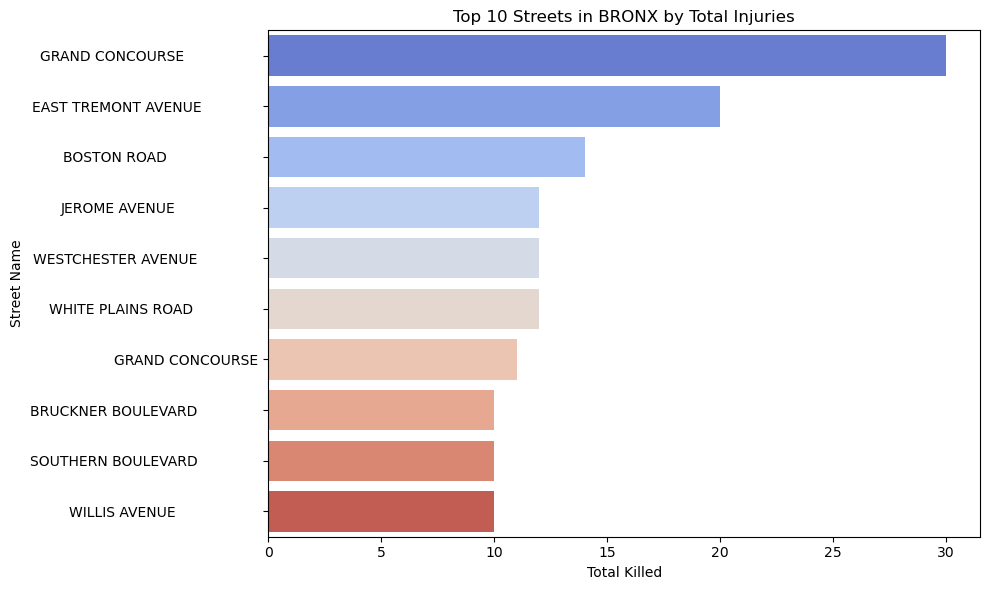

/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_63251/2855682286.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=borough_data, x='total_killed', y='ON STREET NAME', ci=None, palette='coolwarm')


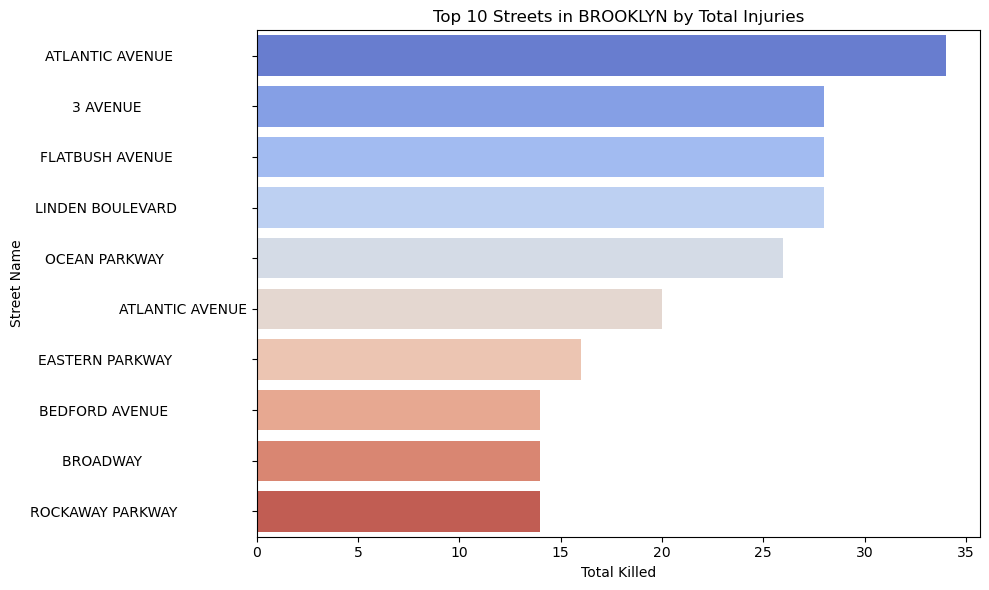

/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_63251/2855682286.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=borough_data, x='total_killed', y='ON STREET NAME', ci=None, palette='coolwarm')


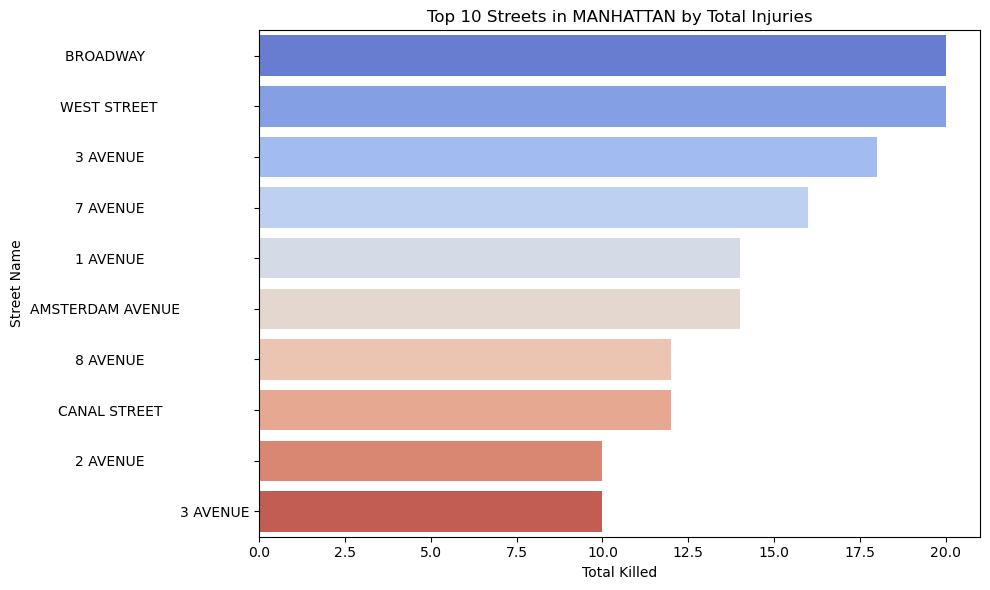

/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_63251/2855682286.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=borough_data, x='total_killed', y='ON STREET NAME', ci=None, palette='coolwarm')


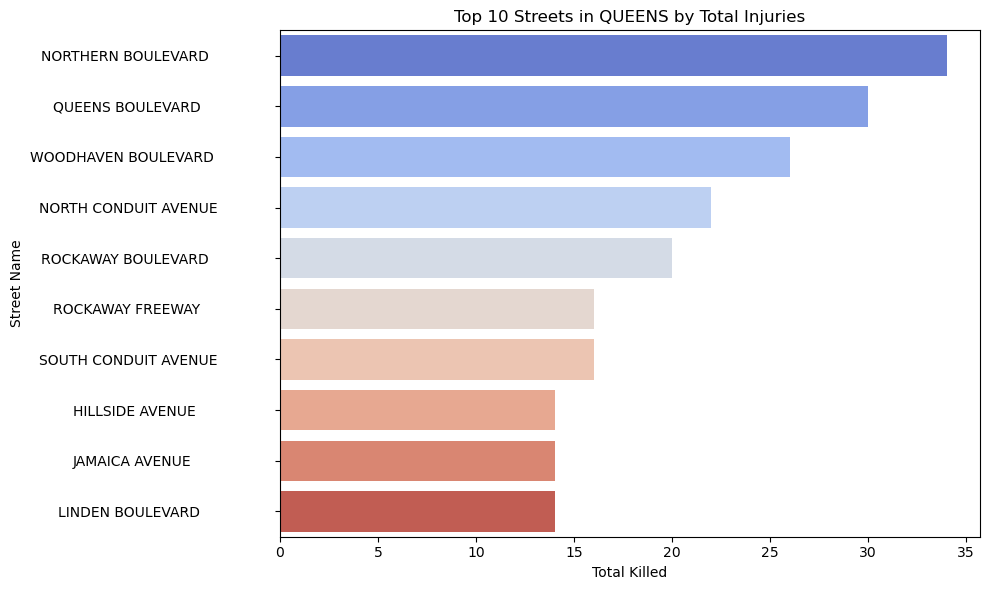

/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_63251/2855682286.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=borough_data, x='total_killed', y='ON STREET NAME', ci=None, palette='coolwarm')


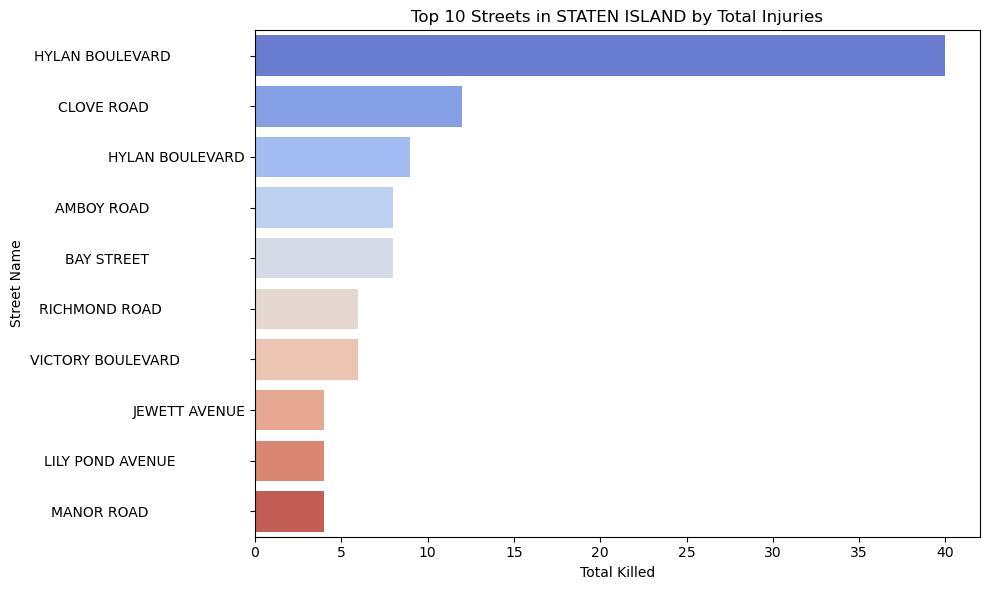

In [39]:
import seaborn as sns
for borough in top_killed_streets_per_borough['BOROUGH'].unique():
    plt.figure(figsize=(10, 6))
    borough_data = top_killed_streets_per_borough[top_killed_streets_per_borough['BOROUGH'] == borough]
    sns.barplot(data=borough_data, x='total_killed', y='ON STREET NAME', ci=None, palette='coolwarm')
    plt.title(f'Top 10 Streets in {borough} by Total Injuries')
    plt.xlabel('Total Killed')
    plt.ylabel('Street Name')
    plt.tight_layout()
    plt.show()


In [41]:
# Chance of getting injured or killed at the top 10 streets of each Borough

# Step 1: Aggregate data by 'BOROUGH' and 'ON STREET NAME'
aggregated_data = mvc_cleaned.groupby(['BOROUGH', 'ON STREET NAME']).agg(
    total_accidents=('ON STREET NAME', 'size'),
    total_injured=('total_injured', 'sum'),
    total_killed=('total_killed', 'sum')
).reset_index()

# Step 2: Calculate probabilities for injury and fatality
aggregated_data['prob_injury'] = aggregated_data['total_injured'] / aggregated_data['total_accidents']
aggregated_data['prob_fatal'] = aggregated_data['total_killed'] / aggregated_data['total_accidents']

# Sort and pick top streets in each borough by some criterion, e.g., total accidents
top_streets = aggregated_data.sort_values(['BOROUGH', 'total_accidents'], ascending=[True, False]).groupby('BOROUGH').head(10)


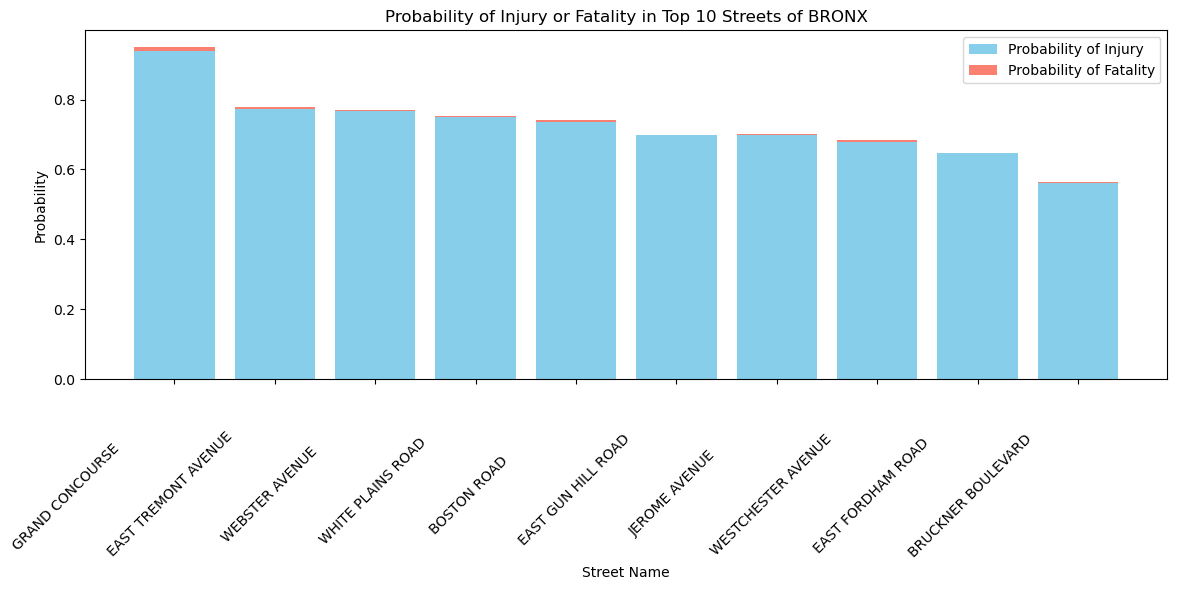

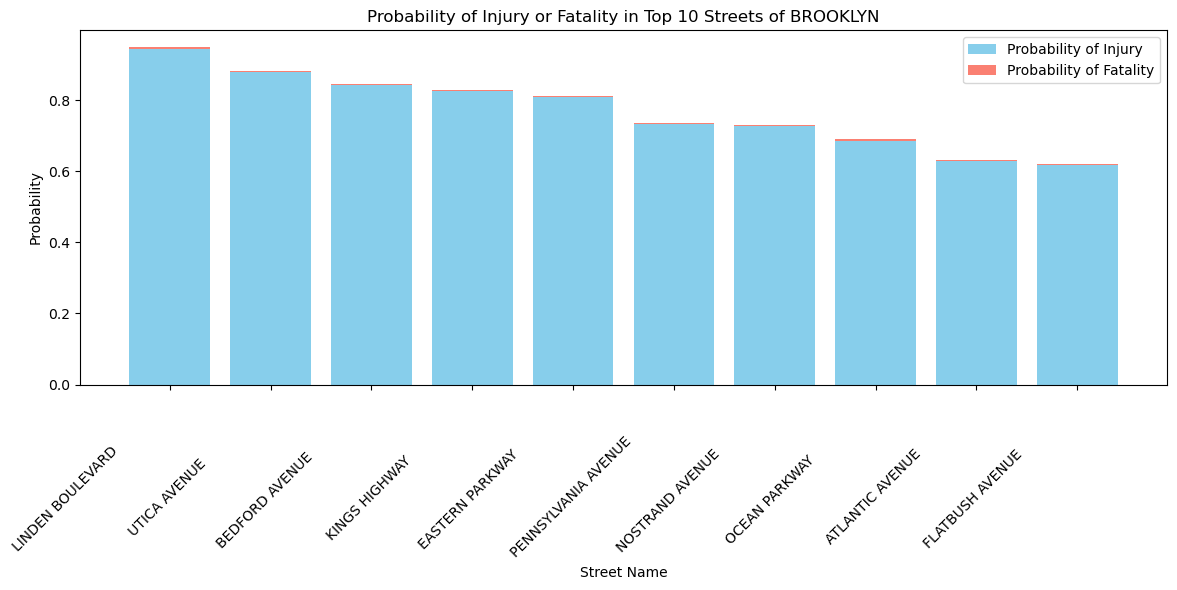

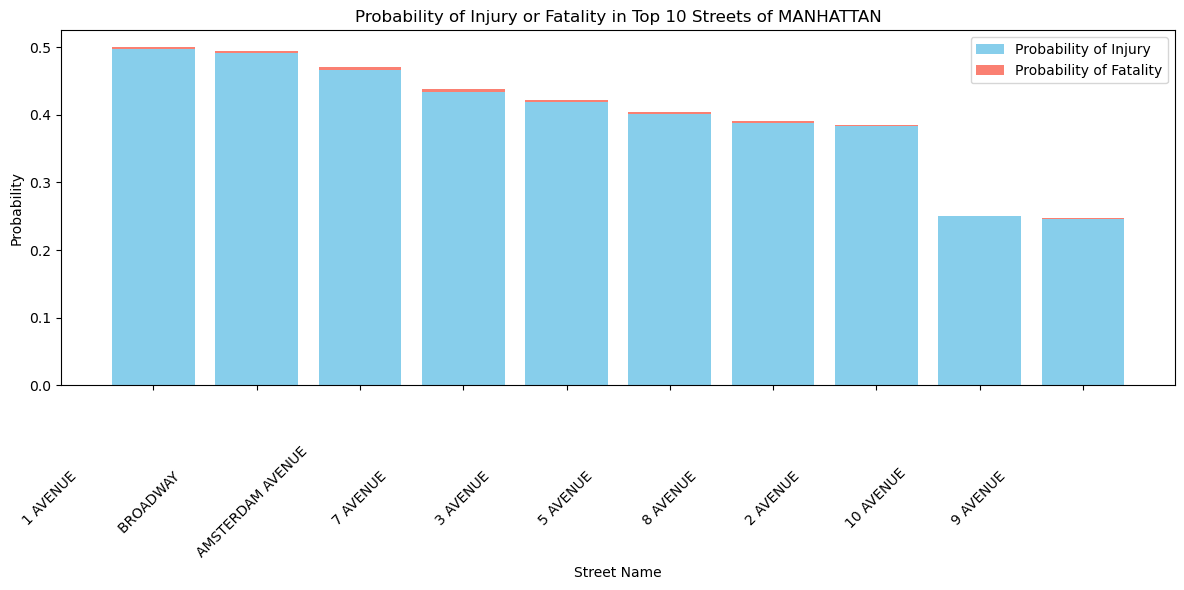

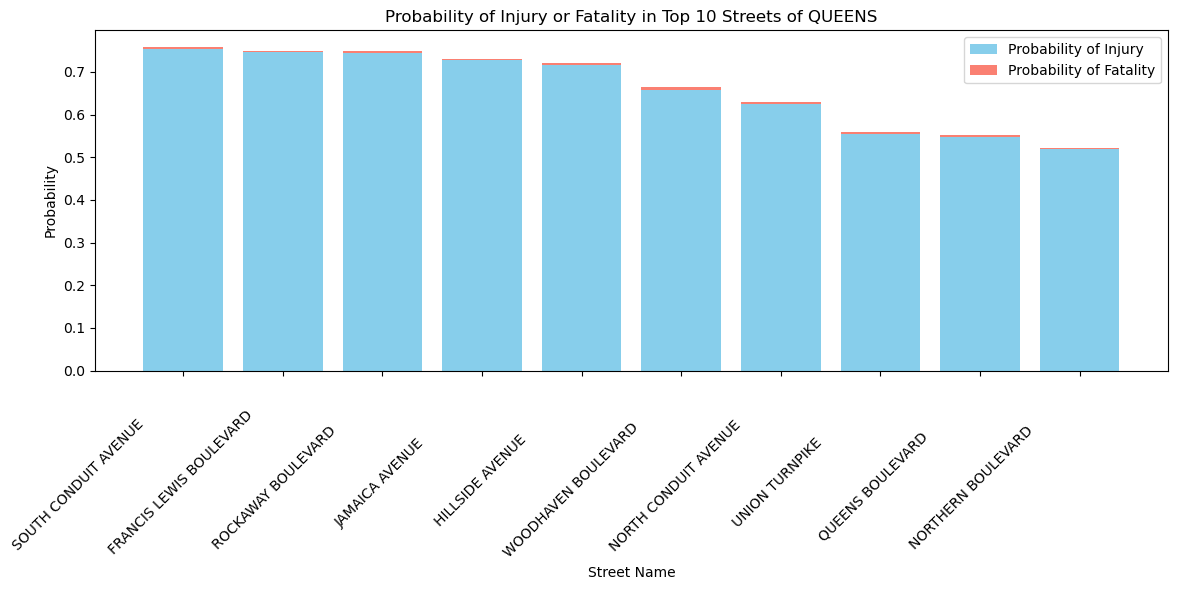

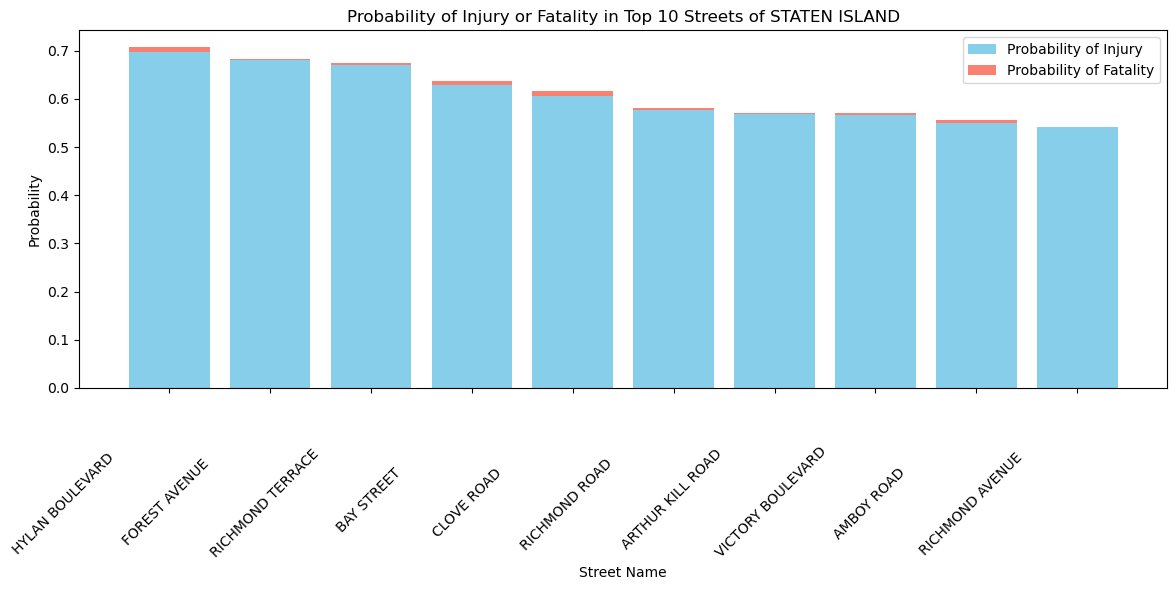

In [42]:
boroughs = top_streets['BOROUGH'].unique()

for borough in boroughs:
    plt.figure(figsize=(12, 6))
    borough_data = top_streets[top_streets['BOROUGH'] == borough]
    
    # Sorting streets by probability of injury for plotting
    borough_data = borough_data.sort_values('prob_injury', ascending=False)
    
    # Creating the plot
    plt.bar(borough_data['ON STREET NAME'], borough_data['prob_injury'], color='skyblue', label='Probability of Injury')
    plt.bar(borough_data['ON STREET NAME'], borough_data['prob_fatal'], bottom=borough_data['prob_injury'], color='salmon', label='Probability of Fatality')
    
    plt.xlabel('Street Name')
    plt.ylabel('Probability')
    plt.title(f'Probability of Injury or Fatality in Top 10 Streets of {borough}')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [35]:
mvc_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075961 entries, 0 to 2075960
Data columns (total 25 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   BOROUGH                        object        
 2   ZIP CODE                       object        
 3   LATITUDE                       float64       
 4   LONGITUDE                      float64       
 5   LOCATION                       object        
 6   ON STREET NAME                 object        
 7   CROSS STREET NAME              object        
 8   NUMBER OF PERSONS INJURED      float64       
 9   NUMBER OF PERSONS KILLED       float64       
 10  NUMBER OF PEDESTRIANS INJURED  int64         
 11  NUMBER OF PEDESTRIANS KILLED   int64         
 12  NUMBER OF CYCLIST INJURED      int64         
 13  NUMBER OF CYCLIST KILLED       int64         
 14  NUMBER OF MOTORIST INJURED     int64         
 15  NUMBER OF MOTOR

In [44]:
mvc_cleaned['VEHICLE TYPE CODE 1'].nunique()

1631

In [48]:
# Top 20 vehicles types in accidents
top_vehicles = mvc_cleaned['VEHICLE TYPE CODE 1'].value_counts().head(20)

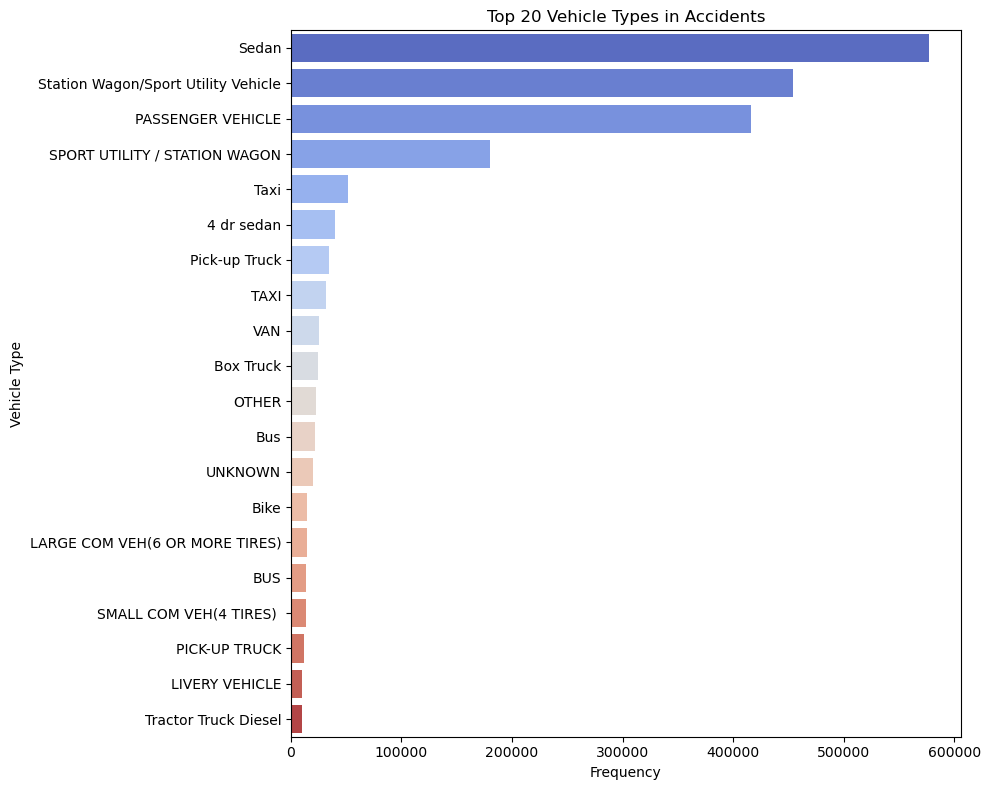

In [47]:
# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=top_vehicles.values, y=top_vehicles.index, palette='coolwarm')
plt.title('Top 20 Vehicle Types in Accidents')
plt.xlabel('Frequency')
plt.ylabel('Vehicle Type')
plt.tight_layout()
plt.show()

In [51]:
conda install -c conda-forge geopandas

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
 - pytorch
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/adnanarnaout/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.7.1               |     pyhd8ed1ab_0          29 KB  conda-forge
    cairo-1.16.0               |       h302bd0f_5         1.0 MB
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.7.2                |     pyhd8ed1ab_1          10 KB  conda-forge
    expat-2.5.0                |       hb7217d7_1         115 KB  conda-forge
    fiona-1.9.1                |  py311habcf648_0         769 KB  conda-forge
    folium-0.16.0              |     pyhd8ed1ab_0          72 KB  conda-forge
    fontconfig-2.14.2          |       h82840c6_0         232 KB  conda

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Filter out rows with invalid coordinates
valid_data = mvc_cleaned[(mvc_cleaned['LONGITUDE'].between(-74.05, -73.7)) &
                         (mvc_cleaned['LATITUDE'].between(40.5, 40.9)) &
                         (mvc_cleaned['LONGITUDE'] != 0) &
                         (mvc_cleaned['LATITUDE'] != 0)]

valid_data = valid_data.head(10000)

# Convert the valid_data DataFrame to a GeoDataFrame
gdf_valid_accidents = gpd.GeoDataFrame(valid_data, 
                                       geometry=gpd.points_from_xy(valid_data['LONGITUDE'], valid_data['LATITUDE']),
                                       crs='EPSG:4326')

# Load New York City map
nyc_map = gpd.read_file('Borough Boundaries.geojson')

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
nyc_map.plot(ax=ax, color='lightgrey')
gdf_valid_accidents.plot(ax=ax, marker='o', color='red', markersize=5)

# Set the plot limits to the valid ranges for NYC
ax.set_xlim(-74.05, -73.7)
ax.set_ylim(40.5, 40.9)

plt.title('Accidents in New York City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


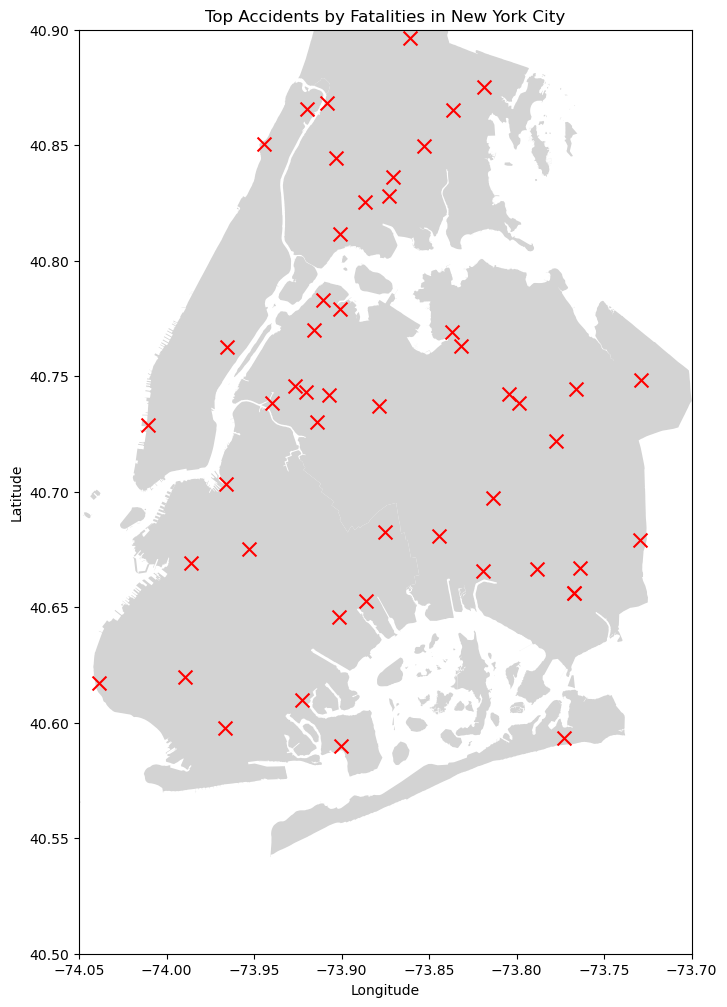

In [88]:
# Top 50 killed accidents on the map

# Filter the data to exclude invalid coordinates as before
valid_data = mvc_cleaned[(mvc_cleaned['LONGITUDE'].between(-74.05, -73.7)) &
                         (mvc_cleaned['LATITUDE'].between(40.5, 40.9)) &
                         (mvc_cleaned['LONGITUDE'] != 0) &
                         (mvc_cleaned['LATITUDE'] != 0)]

# Sort the data by 'total_killed' in descending order to get the top accidents with most fatalities
top_killed_accidents = valid_data.sort_values('total_killed', ascending=False).head(50)

# Convert the top_killed_accidents DataFrame to a GeoDataFrame
gdf_top_killed_accidents = gpd.GeoDataFrame(top_killed_accidents,
                                             geometry=gpd.points_from_xy(top_killed_accidents['LONGITUDE'],
                                                                         top_killed_accidents['LATITUDE']),
                                             crs='EPSG:4326')

# Load New York City map
nyc_map = gpd.read_file('Borough Boundaries.geojson')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 12))
nyc_map.plot(ax=ax, color='lightgrey')  # Plot the NYC map as a background
gdf_top_killed_accidents.plot(ax=ax, marker='x', color='red', markersize=100)  # Plot the top accidents

# Set the plot limits to the valid ranges for NYC
ax.set_xlim(-74.05, -73.7)
ax.set_ylim(40.5, 40.9)

plt.title('Top Accidents by Fatalities in New York City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

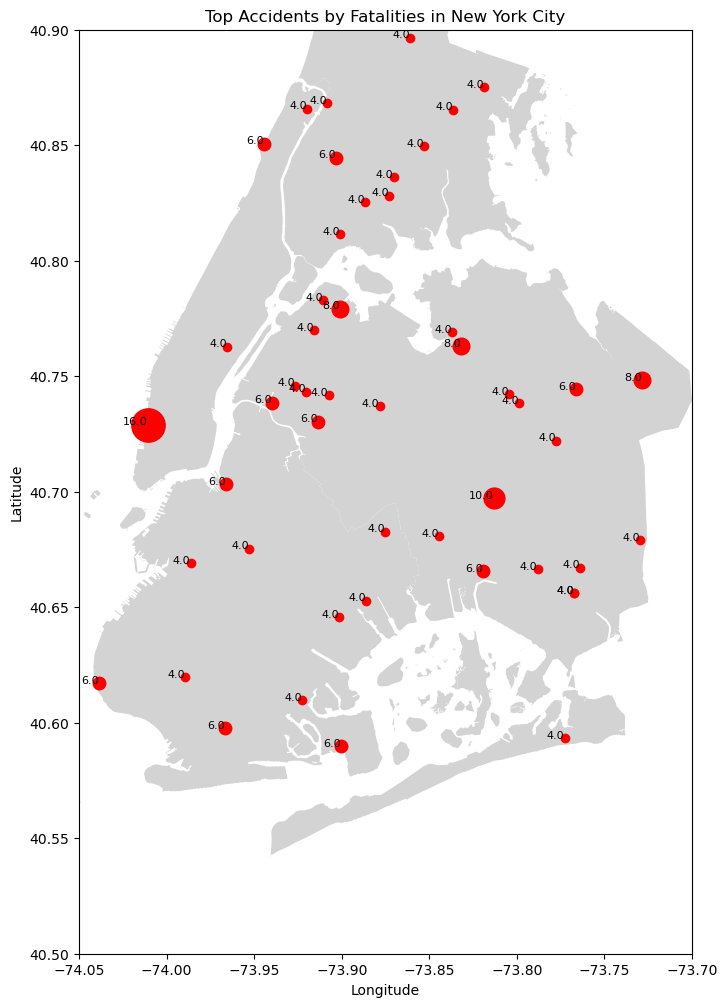

In [89]:

fig, ax = plt.subplots(figsize=(12, 12))
nyc_map.plot(ax=ax, color='lightgrey')  # Plot the NYC map as a background

# Plot each accident with the number of fatalities
for idx, row in gdf_top_killed_accidents.iterrows():
    ax.plot(row['geometry'].x, row['geometry'].y, marker='o', color='red', markersize=row['total_killed']*1.5)  # Adjust marker size as needed
    ax.text(row['geometry'].x, row['geometry'].y, s=row['total_killed'], fontsize=8, ha='right')  # Annotate the point with the number of killed

# Set the plot limits to the valid ranges for NYC
ax.set_xlim(-74.05, -73.7)
ax.set_ylim(40.5, 40.9)

plt.title('Top Accidents by Fatalities in New York City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


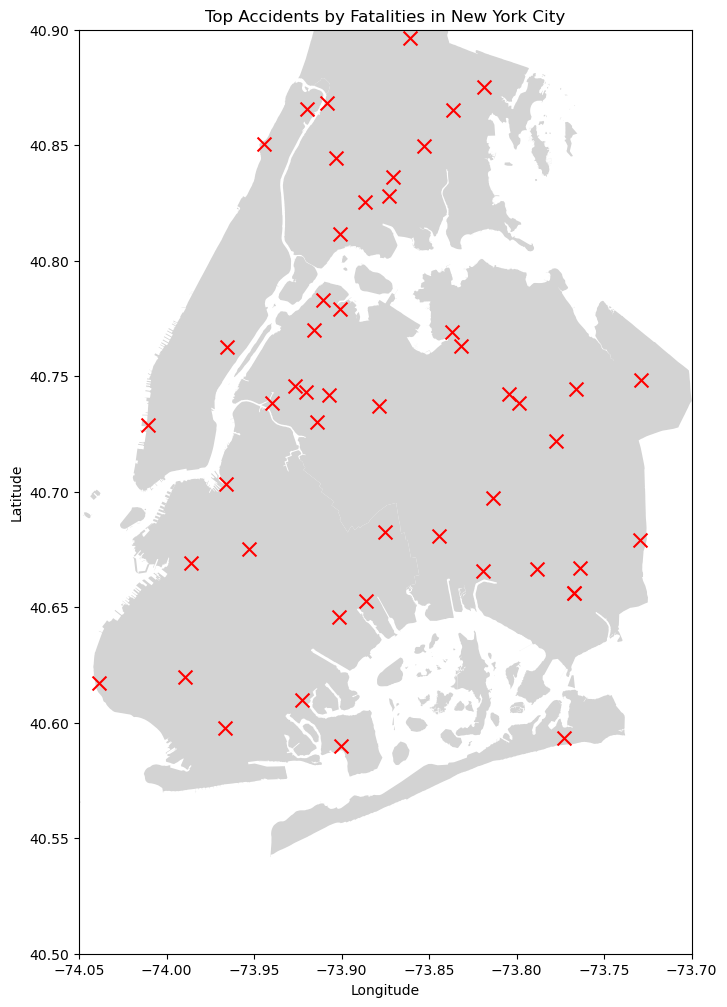

In [90]:
# Top 50 injury accidents on the map

# Sort the data by 'total_killed' in descending order to get the top accidents with most fatalities
top_injured_accidents = valid_data.sort_values('total_injured', ascending=False).head(50)

# Convert the top_killed_accidents DataFrame to a GeoDataFrame
gdf_top_injured_accidents = gpd.GeoDataFrame(top_injured_accidents,
                                             geometry=gpd.points_from_xy(top_injured_accidents['LONGITUDE'],
                                                                         top_injured_accidents['LATITUDE']),
                                             crs='EPSG:4326')

# Load New York City map
nyc_map = gpd.read_file('Borough Boundaries.geojson')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 12))
nyc_map.plot(ax=ax, color='lightgrey')  # Plot the NYC map as a background
gdf_top_killed_accidents.plot(ax=ax, marker='x', color='red', markersize=100)  # Plot the top accidents

# Set the plot limits to the valid ranges for NYC
ax.set_xlim(-74.05, -73.7)
ax.set_ylim(40.5, 40.9)

plt.title('Top Accidents by Fatalities in New York City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

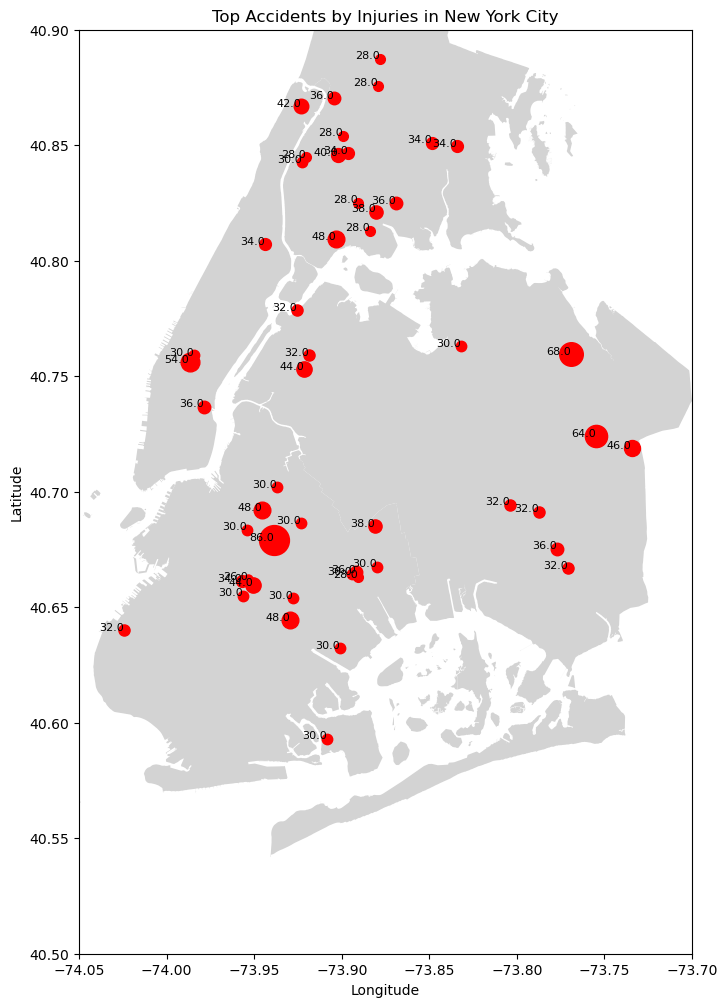

In [91]:

fig, ax = plt.subplots(figsize=(12, 12))
nyc_map.plot(ax=ax, color='lightgrey')  # Plot the NYC map as a background

# Plot each accident with the number of fatalities
for idx, row in gdf_top_injured_accidents.iterrows():
    ax.plot(row['geometry'].x, row['geometry'].y, marker='o', color='red', markersize=row['total_injured']*.25)  # Adjust marker size as needed
    ax.text(row['geometry'].x, row['geometry'].y, s=row['total_injured'], fontsize=8, ha='right')  # Annotate the point with the number of killed

# Set the plot limits to the valid ranges for NYC
ax.set_xlim(-74.05, -73.7)
ax.set_ylim(40.5, 40.9)

plt.title('Top Accidents by Injuries in New York City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [82]:
top_killed_accidents

,CRASH DATE,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,epoch_time,time_as_hours,total_injured,total_killed
782073,2017-10-31,MANHATTAN,10014.0,40.729046,-74.010730,"(40.729046, -74.01073)",WEST STREET,WEST HOUSTON STREET,12.0,8.0,...,0,Other Vehicular,Unspecified,3782508,Flat Bed,Bus,1509408000,15.133333,24.0,16.0
1909908,2012-07-22,QUEENS,11418,40.697204,-73.813334,"(40.6972045, -73.8133341)",94 AVENUE,VAN WYCK EXPRESSWAY,3.0,5.0,...,5,Traffic Control Disregarded,NaN,208863,SPORT UTILITY / STATION WAGON,NaN,1342915200,3.333333,6.0,10.0
818481,2017-09-18,QUEENS,11354.0,40.762978,-73.831980,"(40.762978, -73.83198)",NORTHERN BOULEVARD,MAIN STREET,15.0,4.0,...,2,Unsafe Speed,Unspecified,3752786,Bus,Bus,1505692800,6.283333,30.0,8.0
270981,2020-01-25,NaN,NaN,40.748398,-73.728790,"(40.748398, -73.72879)",GRAND CENTRAL PKWY,NaN,0.0,4.0,...,4,Unsafe Speed,Unspecified,4278634,Sedan,Sedan,1579910400,5.583333,0.0,8.0
1585649,2014-04-04,QUEENS,11105,40.779280,-73.900874,"(40.7792798, -73.9008742)",19 AVENUE,37 STREET,1.0,4.0,...,4,Driver Inexperience,NaN,316814,PASSENGER VEHICLE,NaN,1396569600,22.583333,2.0,8.0
1051105,2016-08-31,NaN,NaN,40.730366,-73.913880,"(40.730366, -73.91388)",LONG ISLAND EXPRESSWAY,NaN,3.0,3.0,...,3,Unsafe Speed,Unspecified,3511547,Sedan,Sedan,1472601600,4.283333,6.0,6.0
966508,2016-12-27,NaN,NaN,40.844604,-73.903480,"(40.844604, -73.90348)",CROSS BRONX EXPY,NaN,5.0,3.0,...,3,Driver Inattention/Distraction,Unspecified,3588439,Tractor Truck Diesel,Sedan,1482796800,5.683333,10.0,6.0
1307772,2015-07-01,QUEENS,11364.0,40.744509,-73.766099,"(40.7445094, -73.7660986)",210 STREET,64 AVENUE,3.0,3.0,...,3,Traffic Control Disregarded,Unspecified,3251308,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,1435708800,18.100000,6.0,6.0
219642,2020-10-06,QUEENS,11420.0,40.665490,-73.819534,"(40.66549, -73.819534)",NORTH CONDUIT AVENUE,122 STREET,1.0,3.0,...,3,Unsafe Speed,NaN,4355333,Sedan,NaN,1601942400,3.866667,2.0,6.0
2020736,2023-05-07,NaN,NaN,40.617180,-74.038770,"(40.61718, -74.03877)",SHORE ROAD,NaN,1.0,3.0,...,3,Unsafe Speed,NaN,4627379,Sedan,NaN,1683417600,7.766667,2.0,6.0


In [83]:
top_injured_accidents

,CRASH DATE,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,epoch_time,time_as_hours,total_injured,total_killed
1692931,2013-09-09,BROOKLYN,11213,40.679035,-73.938508,"(40.6790346, -73.9385077)",HERKIMER STREET,ALBANY AVENUE,43.0,0.0,...,0,Unspecified,Unspecified,183929,PASSENGER VEHICLE,BUS,1378684800,16.633333,86.0,0.0
2008536,2023-04-07,QUEENS,11361.0,40.759580,-73.768940,"(40.75958, -73.76894)",BELL BOULEVARD,45 ROAD,34.0,0.0,...,0,Traffic Control Disregarded,Unspecified,4619206,Bus,Box Truck,1680825600,22.400000,68.0,0.0
1364129,2015-04-17,QUEENS,11427.0,40.724159,-73.754968,"(40.7241585, -73.7549679)",HILLSIDE AVENUE,HOLLIS COURT BOULEVARD,32.0,0.0,...,0,Physical Disability,Unspecified,3204269,SMALL COM VEH(4 TIRES),BUS,1429228800,11.716667,64.0,0.0
881712,2017-05-18,MANHATTAN,10036.0,40.756035,-73.986950,"(40.756035, -73.98695)",7 AVENUE,WEST 42 STREET,27.0,1.0,...,0,Drugs (illegal),NaN,3673559,Sedan,NaN,1495065600,11.900000,54.0,2.0
1914186,2012-08-01,NaN,NaN,40.809293,-73.903118,"(40.8092926, -73.9031183)",NaN,NaN,24.0,0.0,...,0,Driver Inattention/Distraction,Driver Inattention/Distraction,2879058,BUS,VAN,1343779200,17.000000,48.0,0.0
1411674,2015-01-07,BROOKLYN,11203,40.644432,-73.929599,"(40.6444315, -73.9295994)",UTICA AVENUE,CLARENDON ROAD,24.0,0.0,...,0,Traffic Control Disregarded,Failure to Yield Right-of-Way,3148869,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,1420588800,15.966667,48.0,0.0
1718999,2013-07-22,BROOKLYN,11221.0,40.692035,-73.945643,"(40.6920346, -73.9456428)",DEKALB AVENUE,TOMPKINS AVENUE,24.0,0.0,...,0,Unspecified,Unspecified,181455,LARGE COM VEH(6 OR MORE TIRES),BUS,1374451200,18.150000,48.0,0.0
2004508,2023-03-17,QUEENS,11428.0,40.718930,-73.734390,"(40.71893, -73.73439)",220 STREET,JAMAICA AVENUE,23.0,0.0,...,0,Driver Inattention/Distraction,Unspecified,4616707,Station Wagon/Sport Utility Vehicle,Bus,1679011200,21.366667,46.0,0.0
1330547,2015-06-08,QUEENS,11101.0,40.753028,-73.921620,"(40.7530285, -73.9216199)",NORTHERN BOULEVARD,42 STREET,22.0,0.0,...,0,Fatigued/Drowsy,Unspecified,3237061,SPORT UTILITY / STATION WAGON,BUS,1433721600,13.000000,44.0,0.0
684652,2018-04-06,BROOKLYN,11225.0,40.659405,-73.950500,"(40.659405, -73.9505)",NOSTRAND AVENUE,RUTLAND ROAD,22.0,0.0,...,0,Driver Inattention/Distraction,Unspecified,3876246,Sedan,Bus,1522972800,7.500000,44.0,0.0


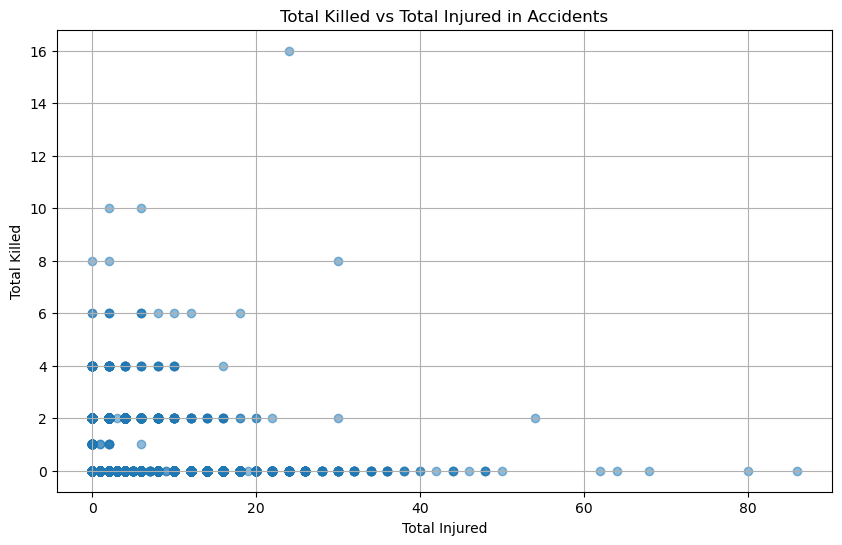

In [85]:
# Create scatter plot of total_killed vs total_injured

plt.figure(figsize=(10, 6))
plt.scatter(mvc_cleaned['total_injured'], mvc_cleaned['total_killed'], alpha=0.5)

plt.title('Total Killed vs Total Injured in Accidents')
plt.xlabel('Total Injured')
plt.ylabel('Total Killed')
plt.grid(True)
plt.show()
